In [1]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.path.dirname(os.getcwd()))
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [3]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_cost.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_cost.csv'

In [4]:
results_cost = pd.read_csv(path)
results_cost.head()

,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0.001831,0.001952,0.001975,0.014016,0.013489,0.013201
1,0.001718,0.001850,0.001870,0.008083,0.008748,0.008287
2,0.001746,0.001876,0.001895,0.003785,0.003837,0.003679
3,0.001665,0.001740,0.001747,0.003812,0.003702,0.003529
4,0.001720,0.001756,0.001757,0.004304,0.004171,0.003961


In [5]:
results_cost = results_cost.reset_index()
results_cost.head()

,index,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0,0.001831,0.001952,0.001975,0.014016,0.013489,0.013201
1,1,0.001718,0.001850,0.001870,0.008083,0.008748,0.008287
2,2,0.001746,0.001876,0.001895,0.003785,0.003837,0.003679
3,3,0.001665,0.001740,0.001747,0.003812,0.003702,0.003529
4,4,0.001720,0.001756,0.001757,0.004304,0.004171,0.003961


In [6]:
results_cost = results_cost.rename(columns={'index': 'epoch'})
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0,0.001831,0.001952,0.001975,0.014016,0.013489,0.013201
1,1,0.001718,0.001850,0.001870,0.008083,0.008748,0.008287
2,2,0.001746,0.001876,0.001895,0.003785,0.003837,0.003679
3,3,0.001665,0.001740,0.001747,0.003812,0.003702,0.003529
4,4,0.001720,0.001756,0.001757,0.004304,0.004171,0.003961


In [7]:
results_cost['epoch'] += 1
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,1,0.001831,0.001952,0.001975,0.014016,0.013489,0.013201
1,2,0.001718,0.001850,0.001870,0.008083,0.008748,0.008287
2,3,0.001746,0.001876,0.001895,0.003785,0.003837,0.003679
3,4,0.001665,0.001740,0.001747,0.003812,0.003702,0.003529
4,5,0.001720,0.001756,0.001757,0.004304,0.004171,0.003961


In [8]:
results_cost = results_cost.drop(['cost_test_baseline', 'cost_test_hypothesis'], axis=1)
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_training_baseline,cost_validation_baseline
0,1,0.001831,0.001952,0.014016,0.013489
1,2,0.001718,0.001850,0.008083,0.008748
2,3,0.001746,0.001876,0.003785,0.003837
3,4,0.001665,0.001740,0.003812,0.003702
4,5,0.001720,0.001756,0.004304,0.004171


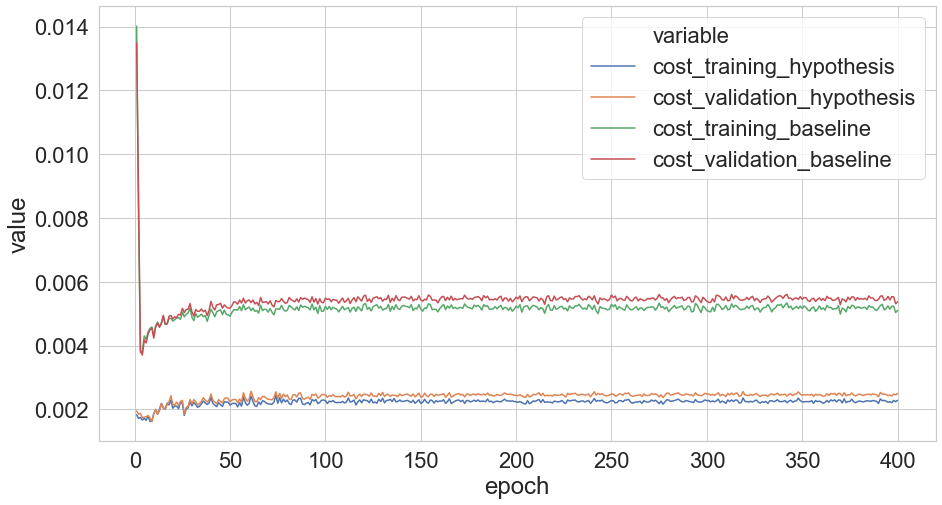

In [9]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost, ['epoch']))
plt.savefig('FB15k-237_Cost_Results.png', bbox_inches = "tight", format='PNG')

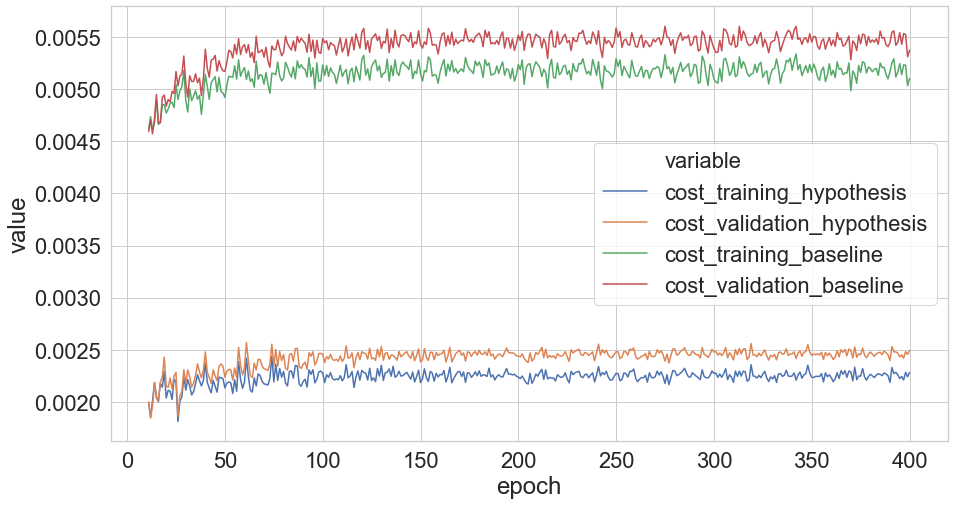

In [10]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost[10:], ['epoch']))
plt.savefig('FB15k-237_Cost_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [11]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_hits_at_10.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_hits_at_10.csv'

In [12]:
results_hits_at_10 = pd.read_csv(path)
results_hits_at_10.head()

,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0.053778,0.055603,0.054627,0.065526,0.065469,0.065132
1,0.077388,0.081779,0.079889,0.100884,0.104477,0.102169
2,0.111092,0.115569,0.114800,0.268663,0.274280,0.283324
3,0.166324,0.176219,0.183524,0.386427,0.346478,0.359743
4,0.211634,0.224808,0.237394,0.503849,0.391816,0.407236


In [13]:
results_hits_at_10 = results_hits_at_10.reset_index()
results_hits_at_10.head()

,index,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0,0.053778,0.055603,0.054627,0.065526,0.065469,0.065132
1,1,0.077388,0.081779,0.079889,0.100884,0.104477,0.102169
2,2,0.111092,0.115569,0.114800,0.268663,0.274280,0.283324
3,3,0.166324,0.176219,0.183524,0.386427,0.346478,0.359743
4,4,0.211634,0.224808,0.237394,0.503849,0.391816,0.407236


In [14]:
results_hits_at_10 = results_hits_at_10.rename(columns={'index': 'epoch'})
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0,0.053778,0.055603,0.054627,0.065526,0.065469,0.065132
1,1,0.077388,0.081779,0.079889,0.100884,0.104477,0.102169
2,2,0.111092,0.115569,0.114800,0.268663,0.274280,0.283324
3,3,0.166324,0.176219,0.183524,0.386427,0.346478,0.359743
4,4,0.211634,0.224808,0.237394,0.503849,0.391816,0.407236


In [15]:
results_hits_at_10['epoch'] += 1
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,1,0.053778,0.055603,0.054627,0.065526,0.065469,0.065132
1,2,0.077388,0.081779,0.079889,0.100884,0.104477,0.102169
2,3,0.111092,0.115569,0.114800,0.268663,0.274280,0.283324
3,4,0.166324,0.176219,0.183524,0.386427,0.346478,0.359743
4,5,0.211634,0.224808,0.237394,0.503849,0.391816,0.407236


In [16]:
results_hits_at_10_test = results_hits_at_10[['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis']]
results_hits_at_10_test.head()

,hits_at_10_test_baseline,hits_at_10_test_hypothesis
0,0.065132,0.054627
1,0.102169,0.079889
2,0.283324,0.114800
3,0.359743,0.183524
4,0.407236,0.237394


In [17]:
results_hits_at_10_test.max()

hits_at_10_test_baseline      0.505717
hits_at_10_test_hypothesis    0.522037
dtype: float64

In [18]:
results_hits_at_10 = results_hits_at_10.drop(['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis'], axis=1)
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline
0,1,0.053778,0.055603,0.065526,0.065469
1,2,0.077388,0.081779,0.100884,0.104477
2,3,0.111092,0.115569,0.268663,0.274280
3,4,0.166324,0.176219,0.386427,0.346478
4,5,0.211634,0.224808,0.503849,0.391816


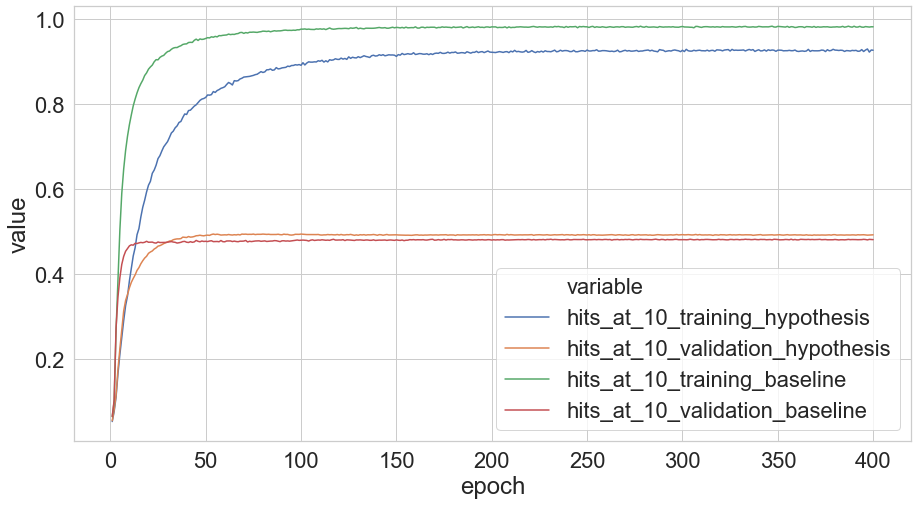

In [19]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10, ['epoch']))
plt.savefig('FB15k-237_hits_at_10_Results.png', bbox_inches = "tight", format='PNG')

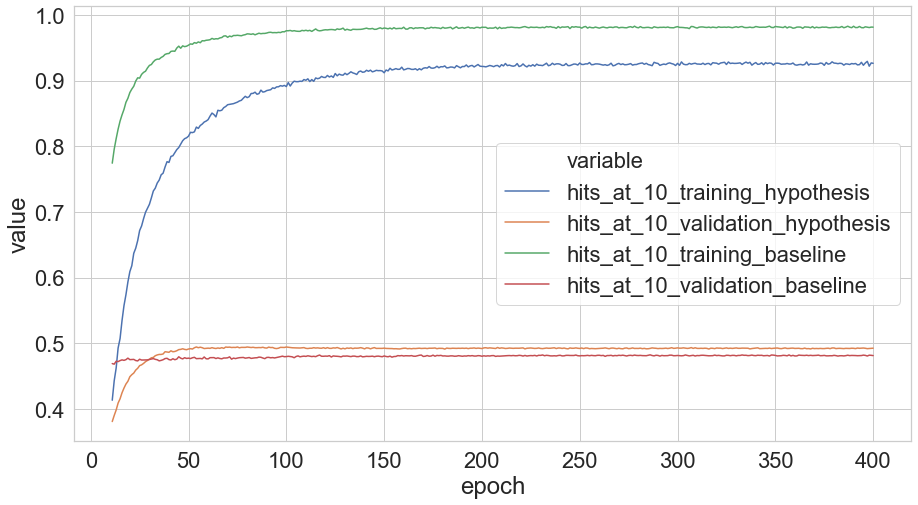

In [20]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10[10:], ['epoch']))
plt.savefig('FB15k-237_hits_at_10_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [21]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_hits_at_3.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_hits_at_3.csv'

In [22]:
results_hits_at_3 = pd.read_csv(path)
results_hits_at_3.head()

,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0.028058,0.029028,0.029659,0.035729,0.028628,0.030245
1,0.041660,0.035529,0.036109,0.061848,0.063216,0.061468
2,0.064557,0.057656,0.058903,0.178586,0.186085,0.197816
3,0.091474,0.094639,0.101046,0.256459,0.234902,0.249878
4,0.128400,0.136327,0.149223,0.346450,0.262275,0.286353


In [23]:
results_hits_at_3 = results_hits_at_3.reset_index()
results_hits_at_3.head()

,index,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0,0.028058,0.029028,0.029659,0.035729,0.028628,0.030245
1,1,0.041660,0.035529,0.036109,0.061848,0.063216,0.061468
2,2,0.064557,0.057656,0.058903,0.178586,0.186085,0.197816
3,3,0.091474,0.094639,0.101046,0.256459,0.234902,0.249878
4,4,0.128400,0.136327,0.149223,0.346450,0.262275,0.286353


In [24]:
results_hits_at_3 = results_hits_at_3.rename(columns={'index': 'epoch'})
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0,0.028058,0.029028,0.029659,0.035729,0.028628,0.030245
1,1,0.041660,0.035529,0.036109,0.061848,0.063216,0.061468
2,2,0.064557,0.057656,0.058903,0.178586,0.186085,0.197816
3,3,0.091474,0.094639,0.101046,0.256459,0.234902,0.249878
4,4,0.128400,0.136327,0.149223,0.346450,0.262275,0.286353


In [25]:
results_hits_at_3['epoch'] += 1
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,1,0.028058,0.029028,0.029659,0.035729,0.028628,0.030245
1,2,0.041660,0.035529,0.036109,0.061848,0.063216,0.061468
2,3,0.064557,0.057656,0.058903,0.178586,0.186085,0.197816
3,4,0.091474,0.094639,0.101046,0.256459,0.234902,0.249878
4,5,0.128400,0.136327,0.149223,0.346450,0.262275,0.286353


In [26]:
results_hits_at_3_test = results_hits_at_3[['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis']]
results_hits_at_3_test.head()

,hits_at_3_test_baseline,hits_at_3_test_hypothesis
0,0.030245,0.029659
1,0.061468,0.036109
2,0.197816,0.058903
3,0.249878,0.101046
4,0.286353,0.149223


In [27]:
results_hits_at_3_test.max()

hits_at_3_test_baseline      0.357153
hits_at_3_test_hypothesis    0.376234
dtype: float64

In [28]:
results_hits_at_3 = results_hits_at_3.drop(['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis'], axis=1)
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline
0,1,0.028058,0.029028,0.035729,0.028628
1,2,0.041660,0.035529,0.061848,0.063216
2,3,0.064557,0.057656,0.178586,0.186085
3,4,0.091474,0.094639,0.256459,0.234902
4,5,0.128400,0.136327,0.346450,0.262275


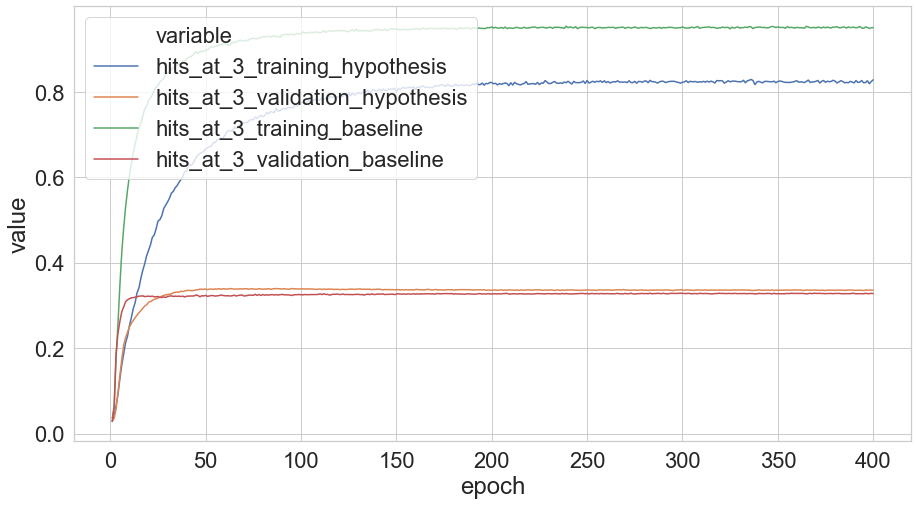

In [29]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3, ['epoch']))
plt.savefig('FB15k-237_hits_at_3_Results.png', bbox_inches = "tight", format='PNG')

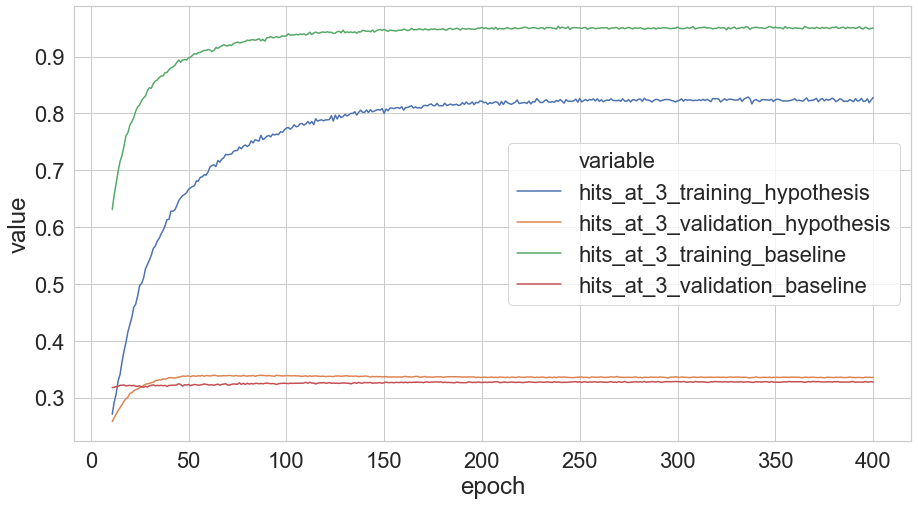

In [30]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3[10:], ['epoch']))
plt.savefig('FB15k-237_hits_at_3_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [31]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_hits_at_1.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_hits_at_1.csv'

In [32]:
results_hits_at_1 = pd.read_csv(path)
results_hits_at_1.head()

,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0.012432,0.013858,0.013706,0.017479,0.013373,0.014292
1,0.020388,0.015654,0.015514,0.043684,0.044397,0.043145
2,0.029541,0.021272,0.023087,0.111520,0.120787,0.130192
3,0.054434,0.052409,0.059635,0.148360,0.146963,0.164932
4,0.082293,0.085686,0.097430,0.197747,0.162874,0.189436


In [33]:
results_hits_at_1 = results_hits_at_1.reset_index()
results_hits_at_1.head()

,index,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0,0.012432,0.013858,0.013706,0.017479,0.013373,0.014292
1,1,0.020388,0.015654,0.015514,0.043684,0.044397,0.043145
2,2,0.029541,0.021272,0.023087,0.111520,0.120787,0.130192
3,3,0.054434,0.052409,0.059635,0.148360,0.146963,0.164932
4,4,0.082293,0.085686,0.097430,0.197747,0.162874,0.189436


In [34]:
results_hits_at_1 = results_hits_at_1.rename(columns={'index': 'epoch'})
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0,0.012432,0.013858,0.013706,0.017479,0.013373,0.014292
1,1,0.020388,0.015654,0.015514,0.043684,0.044397,0.043145
2,2,0.029541,0.021272,0.023087,0.111520,0.120787,0.130192
3,3,0.054434,0.052409,0.059635,0.148360,0.146963,0.164932
4,4,0.082293,0.085686,0.097430,0.197747,0.162874,0.189436


In [35]:
results_hits_at_1['epoch'] += 1
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,1,0.012432,0.013858,0.013706,0.017479,0.013373,0.014292
1,2,0.020388,0.015654,0.015514,0.043684,0.044397,0.043145
2,3,0.029541,0.021272,0.023087,0.111520,0.120787,0.130192
3,4,0.054434,0.052409,0.059635,0.148360,0.146963,0.164932
4,5,0.082293,0.085686,0.097430,0.197747,0.162874,0.189436


In [36]:
results_hits_at_1_test = results_hits_at_1[['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis']]
results_hits_at_1_test.head()

,hits_at_1_test_baseline,hits_at_1_test_hypothesis
0,0.014292,0.013706
1,0.043145,0.015514
2,0.130192,0.023087
3,0.164932,0.059635
4,0.189436,0.097430


In [37]:
results_hits_at_1_test.max()

hits_at_1_test_baseline      0.239031
hits_at_1_test_hypothesis    0.251564
dtype: float64

In [38]:
results_hits_at_1 = results_hits_at_1.drop(['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis'], axis=1)
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline
0,1,0.012432,0.013858,0.017479,0.013373
1,2,0.020388,0.015654,0.043684,0.044397
2,3,0.029541,0.021272,0.111520,0.120787
3,4,0.054434,0.052409,0.148360,0.146963
4,5,0.082293,0.085686,0.197747,0.162874


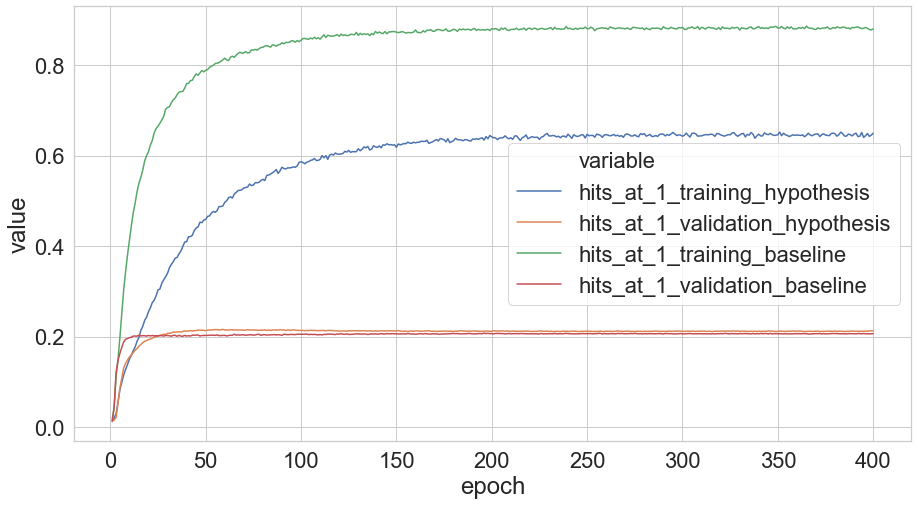

In [39]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1, ['epoch']))
plt.savefig('FB15k-237_hits_at_1_Results.png', bbox_inches = "tight", format='PNG')

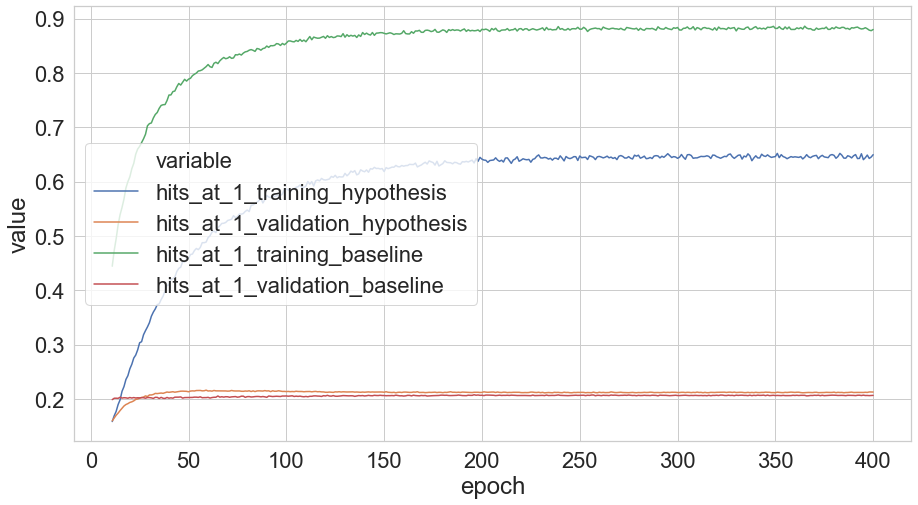

In [40]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1[10:], ['epoch']))
plt.savefig('FB15k-237_hits_at_1_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [41]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_mean_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_mean_rank.csv'

In [42]:
results_mean_rank = pd.read_csv(path)
results_mean_rank.head()

,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,4309.408497,4397.992044,4391.086998,3792.562504,4015.877958,4003.909973
1,3194.618648,3362.115341,3357.948940,2675.154919,3066.281779,3102.594058
2,2414.641346,2586.231594,2592.962939,1091.448931,1437.289279,1452.088610
3,1322.595894,1467.694297,1465.001906,443.152780,692.105446,696.885933
4,756.291389,885.774793,886.363847,203.602310,414.174907,408.667546


In [43]:
results_mean_rank = results_mean_rank.reset_index()
results_mean_rank.head()

,index,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,0,4309.408497,4397.992044,4391.086998,3792.562504,4015.877958,4003.909973
1,1,3194.618648,3362.115341,3357.948940,2675.154919,3066.281779,3102.594058
2,2,2414.641346,2586.231594,2592.962939,1091.448931,1437.289279,1452.088610
3,3,1322.595894,1467.694297,1465.001906,443.152780,692.105446,696.885933
4,4,756.291389,885.774793,886.363847,203.602310,414.174907,408.667546


In [44]:
results_mean_rank = results_mean_rank.rename(columns={'index': 'epoch'})
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,0,4309.408497,4397.992044,4391.086998,3792.562504,4015.877958,4003.909973
1,1,3194.618648,3362.115341,3357.948940,2675.154919,3066.281779,3102.594058
2,2,2414.641346,2586.231594,2592.962939,1091.448931,1437.289279,1452.088610
3,3,1322.595894,1467.694297,1465.001906,443.152780,692.105446,696.885933
4,4,756.291389,885.774793,886.363847,203.602310,414.174907,408.667546


In [45]:
results_mean_rank['epoch'] += 1
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,1,4309.408497,4397.992044,4391.086998,3792.562504,4015.877958,4003.909973
1,2,3194.618648,3362.115341,3357.948940,2675.154919,3066.281779,3102.594058
2,3,2414.641346,2586.231594,2592.962939,1091.448931,1437.289279,1452.088610
3,4,1322.595894,1467.694297,1465.001906,443.152780,692.105446,696.885933
4,5,756.291389,885.774793,886.363847,203.602310,414.174907,408.667546


In [46]:
results_mean_rank_test = results_mean_rank[['mean_rank_test_baseline', 'mean_rank_test_hypothesis']]
results_mean_rank_test.head()

,mean_rank_test_baseline,mean_rank_test_hypothesis
0,4003.909973,4391.086998
1,3102.594058,3357.948940
2,1452.088610,2592.962939
3,696.885933,1465.001906
4,408.667546,886.363847


In [47]:
results_mean_rank_test.min()

mean_rank_test_baseline      294.492817
mean_rank_test_hypothesis    214.847332
dtype: float64

In [48]:
results_mean_rank = results_mean_rank.drop(['mean_rank_test_baseline', 'mean_rank_test_hypothesis'], axis=1)
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline
0,1,4309.408497,4397.992044,3792.562504,4015.877958
1,2,3194.618648,3362.115341,2675.154919,3066.281779
2,3,2414.641346,2586.231594,1091.448931,1437.289279
3,4,1322.595894,1467.694297,443.152780,692.105446
4,5,756.291389,885.774793,203.602310,414.174907


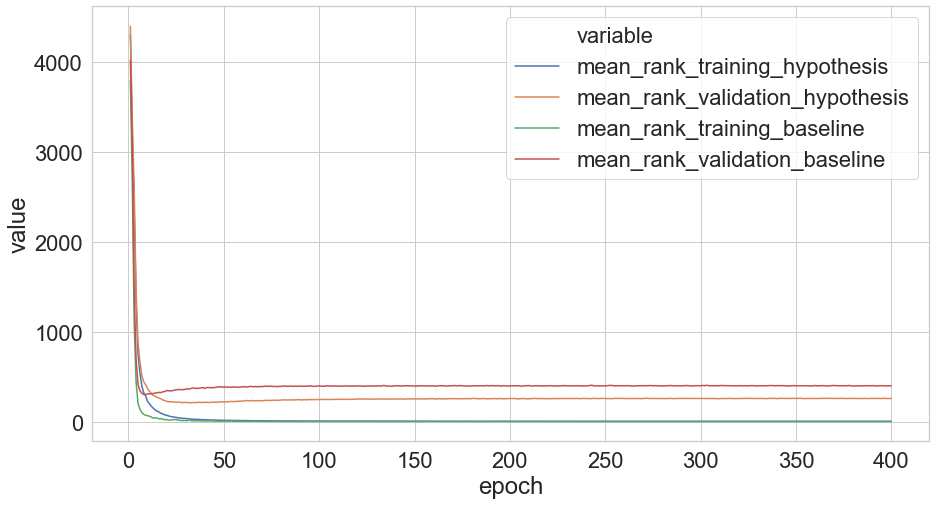

In [49]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank, ['epoch']))
plt.savefig('FB15k-237_mean_rank_Results.png', bbox_inches = "tight", format='PNG')

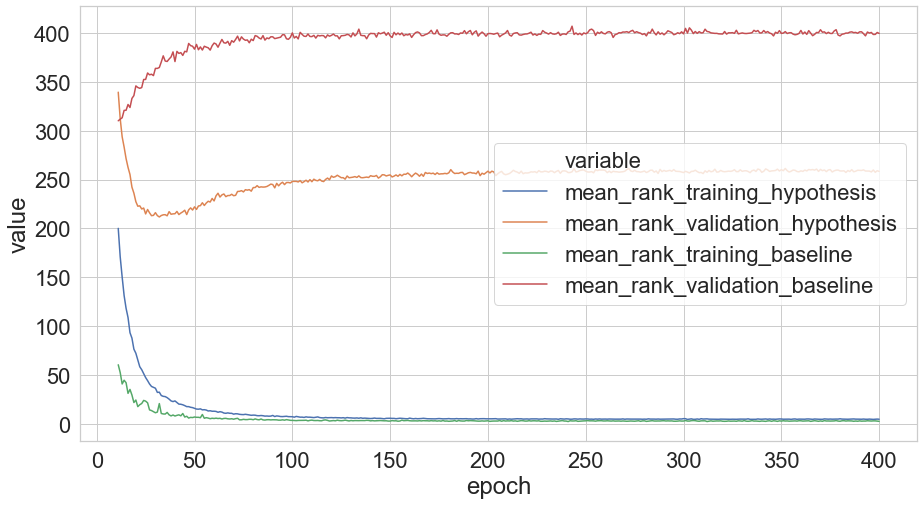

In [50]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank[10:], ['epoch']))
plt.savefig('FB15k-237_mean_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [51]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_mean_reciprocal_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_mean_reciprocal_rank.csv'

In [52]:
results_mean_reciprocal_rank = pd.read_csv(path)
results_mean_reciprocal_rank.head()

,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0.025257,0.026743,0.026620,0.033765,0.029966,0.030768
1,0.041385,0.038731,0.038663,0.063162,0.064642,0.063132
2,0.059198,0.053458,0.055025,0.164785,0.172354,0.182044
3,0.091866,0.093032,0.100053,0.228605,0.213885,0.230124
4,0.125612,0.131831,0.143707,0.301452,0.238810,0.262629


In [53]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.reset_index()
results_mean_reciprocal_rank.head()

,index,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0,0.025257,0.026743,0.026620,0.033765,0.029966,0.030768
1,1,0.041385,0.038731,0.038663,0.063162,0.064642,0.063132
2,2,0.059198,0.053458,0.055025,0.164785,0.172354,0.182044
3,3,0.091866,0.093032,0.100053,0.228605,0.213885,0.230124
4,4,0.125612,0.131831,0.143707,0.301452,0.238810,0.262629


In [54]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.rename(columns={'index': 'epoch'})
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0,0.025257,0.026743,0.026620,0.033765,0.029966,0.030768
1,1,0.041385,0.038731,0.038663,0.063162,0.064642,0.063132
2,2,0.059198,0.053458,0.055025,0.164785,0.172354,0.182044
3,3,0.091866,0.093032,0.100053,0.228605,0.213885,0.230124
4,4,0.125612,0.131831,0.143707,0.301452,0.238810,0.262629


In [55]:
results_mean_reciprocal_rank['epoch'] += 1
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,1,0.025257,0.026743,0.026620,0.033765,0.029966,0.030768
1,2,0.041385,0.038731,0.038663,0.063162,0.064642,0.063132
2,3,0.059198,0.053458,0.055025,0.164785,0.172354,0.182044
3,4,0.091866,0.093032,0.100053,0.228605,0.213885,0.230124
4,5,0.125612,0.131831,0.143707,0.301452,0.238810,0.262629


In [56]:
results_mean_reciprocal_rank_test = results_mean_reciprocal_rank[['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis']]
results_mean_reciprocal_rank_test.head()

,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_test_hypothesis
0,0.030768,0.026620
1,0.063132,0.038663
2,0.182044,0.055025
3,0.230124,0.100053
4,0.262629,0.143707


In [57]:
results_mean_reciprocal_rank_test.max()

mean_reciprocal_rank_test_baseline      0.326164
mean_reciprocal_rank_test_hypothesis    0.341333
dtype: float64

In [58]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.drop(['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis'], axis=1)
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline
0,1,0.025257,0.026743,0.033765,0.029966
1,2,0.041385,0.038731,0.063162,0.064642
2,3,0.059198,0.053458,0.164785,0.172354
3,4,0.091866,0.093032,0.228605,0.213885
4,5,0.125612,0.131831,0.301452,0.238810


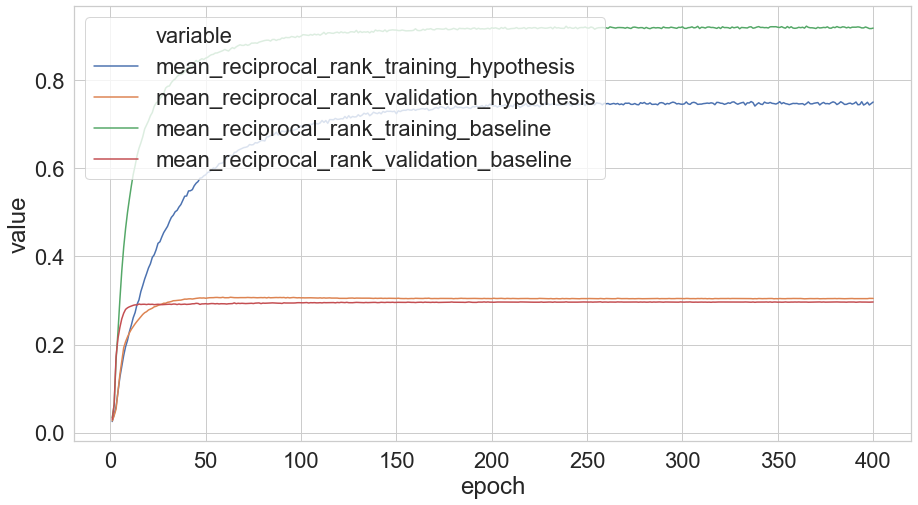

In [59]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank, ['epoch']))
plt.savefig('FB15k-237_mean_reciprocal_rank_Results.png', bbox_inches = "tight", format='PNG')

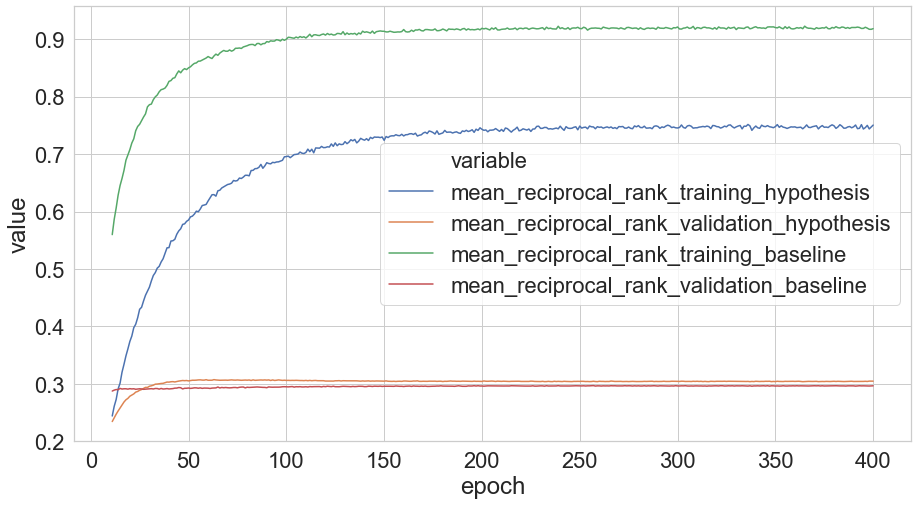

In [60]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank[10:], ['epoch']))
plt.savefig('FB15k-237_mean_reciprocal_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')